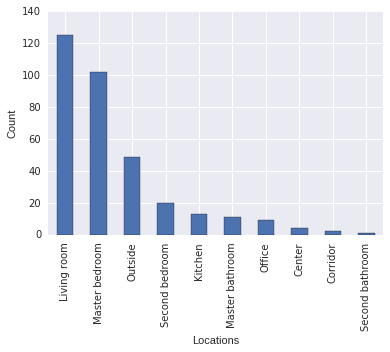

In [23]:
%run ../Evaluation/LoadAndReduceData.ipynb

In [24]:
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

In [68]:
import pymc

living_room_data = dataset[dataset['location_name'].isin(['Living room'])]
#Model
mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
y = pymc.VonMises('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)

model = pymc.MCMC([mu, kappa, y])
model.sample(iter=1000, burn=500, thin=2)
print (name , " mu : " , mu.value , " kappa : " , kappa.value)

 [-----------------100%-----------------] 1000 of 1000 complete in 16.1 secSecond bathroom  mu :  1.7389520125157936  kappa :  0.7461115429827692


In [85]:
dataset['location_name'].unique()
mu_and_kappa = pd.DataFrame({'location':dataset['location_name'].unique(),
                             'mu' : 0.0,
                             'kappa' : 0.0})
mu_and_kappa.index = dataset['location_name'].unique()


In [86]:
import pymc

for name in mu_and_kappa.location:
    print (name) 
    living_room_data = dataset[dataset['location_name'].isin([name])]
    #Model
    mu = pymc.Uniform('mu', lower=-np.pi, upper=np.pi)
    kappa = pymc.Uniform('kappa', lower=0.0, upper=100.0)
    y = pymc.VonMises('y',mu, kappa, value=living_room_data['circular_minute'].values, observed=True)

    model = pymc.MCMC([mu, kappa, y])
    model.sample(iter=1000, burn=500, thin=2)
    print()
    print (name , " mu : " , mu.value , " kappa : " , kappa.value)
    mu_and_kappa.loc[name, 'mu'] = mu.value
    mu_and_kappa.loc[name, 'kappa'] = kappa.value
    
mu_and_kappa

Master bedroom
 [-----------------100%-----------------] 1000 of 1000 complete in 15.3 sec
Master bedroom  mu :  -2.102837210885127  kappa :  2.0298233841173725
Master bathroom
 [-----------------100%-----------------] 1000 of 1000 complete in 1.3 sec
Master bathroom  mu :  -0.6758105474595363  kappa :  1.3115781881628767
Living room
 [-----------------100%-----------------] 1000 of 1000 complete in 15.3 sec
Living room  mu :  1.7439223276004034  kappa :  0.9418493725003698
Kitchen
 [-----------------100%-----------------] 1000 of 1000 complete in 2.5 sec
Kitchen  mu :  0.5667121385600152  kappa :  1.1111686476983056
Second bedroom
 [-----------------100%-----------------] 1000 of 1000 complete in 1.8 sec
Second bedroom  mu :  0.8674061864167756  kappa :  0.5857016962725798
Center
 [-----------------100%-----------------] 1000 of 1000 complete in 0.3 sec
Center  mu :  0.7904333240591593  kappa :  0.9872973903545539
Outside
 [-----------------100%-----------------] 1000 of 1000 complete

,kappa,location,mu
Master bedroom,2.029823,Master bedroom,-2.102837
Master bathroom,1.311578,Master bathroom,-0.675811
Living room,0.941849,Living room,1.743922
Kitchen,1.111169,Kitchen,0.566712
Second bedroom,0.585702,Second bedroom,0.867406
Center,0.987297,Center,0.790433
Outside,2.150960,Outside,0.339314
Corridor,0.528589,Corridor,0.051096
Office,1.927408,Office,1.028700
Second bathroom,1.277403,Second bathroom,0.737306


In [163]:
import pymc 
import scipy.stats as stats
mu_and_kappa['lower_index'] = stats.vonmises.interval(0.9, mu_and_kappa['kappa'])[0] + mu_and_kappa['mu']
mu_and_kappa['upper_index'] = stats.vonmises.interval(0.9, mu_and_kappa['kappa'])[1] + mu_and_kappa['mu']
mu_and_kappa['error'] = stats.vonmises.interval(stats.vonmises.pdf(0, mu_and_kappa['kappa']), mu_and_kappa['kappa'])[1]
mu_and_kappa['indices'] = np.arange(10)
mu_and_kappa['y_error'] = stats.vonmises.pdf(0, mu_and_kappa['kappa'])

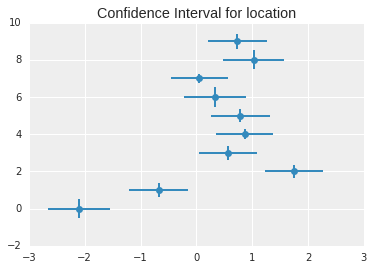

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = mu_and_kappa['mu']
y = mu_and_kappa['indices']

# example variable error bar values
xerr = mu_and_kappa['error']
yerr = mu_and_kappa['y_error']
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o')
plt.title("Confidence Interval for location")

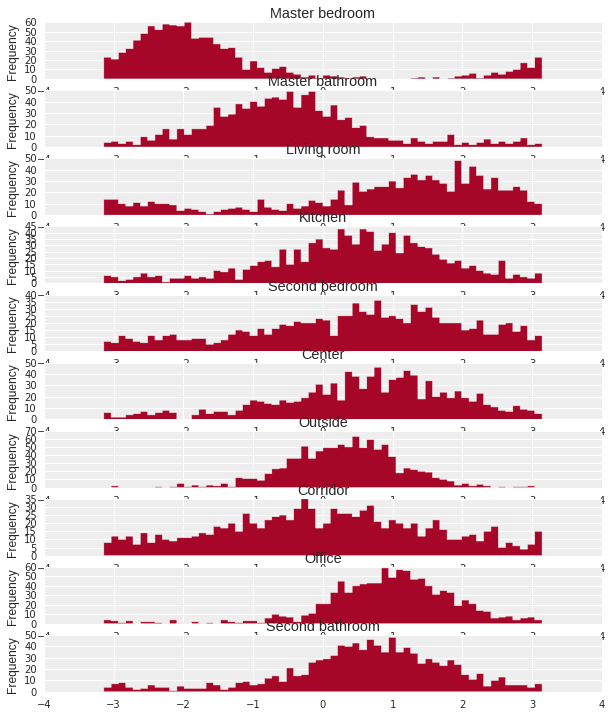

In [133]:

fig = plt.figure(figsize=(10,12))
fig.add_subplot(10,1,1)
for index, row in mu_and_kappa.iterrows():
    fig.add_subplot(10,1,row['indices']+1)
    y_pred = pymc.rvon_mises( row['mu'], row['kappa'], size=(1000,) )
    
    _ = plt.hist(y_pred,range=[-np.pi, np.pi], bins=60, histtype='stepfilled', color=colors[1])   
    _ = plt.ylabel('Frequency')
    _ = plt.title(index)



mu 1.7416559613319573
kappa 0.9410869227257712
(8000,)


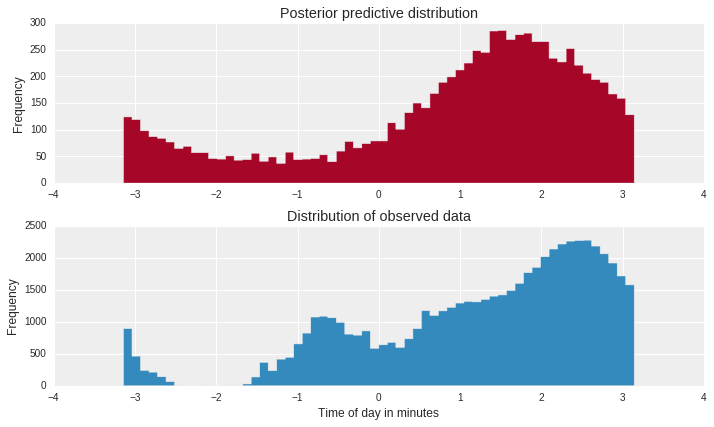

In [8]:
print ('mu',mu.value)
print ('kappa',kappa.value)


y_pred = pymc.rvon_mises( mu.value, kappa.value, size=(8000,) )
print (y_pred.shape)

fig = plt.figure(figsize=(10,6))
fig.add_subplot(211)

fig.add_subplot(211)

_ = plt.hist(y_pred,range=[-np.pi, np.pi], bins=60, histtype='stepfilled', color=colors[1])   
_ = plt.ylabel('Frequency')
_ = plt.title('Posterior predictive distribution')

fig.add_subplot(212)

_ = plt.hist(living_room_data['circular_minute'].values, range=[-np.pi, np.pi], bins=60, histtype='stepfilled')
_ = plt.xlabel('Time of day in minutes')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of observed data')

plt.tight_layout()

Applied stickbreaking-transform to p and added transformed p_stickbreaking to model.
 [-----------------100%-----------------] 50 of 50 complete in 0.1 secSubtensor{int64}.0


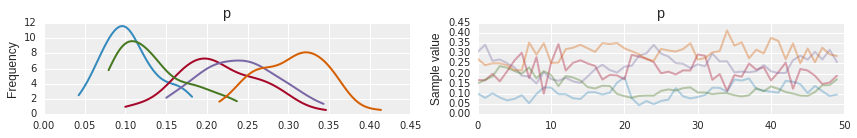

In [159]:
import numpy as np
from pymc3 import *

model = Model()
with model:

    k = 5
    a = constant(np.array([2, 3., 4, 2, 2]))

    p = Dirichlet('p', a, shape=k)
    c = Categorical('c', p, observed=np.random.randint(0, k, 50))

def run(n=3000):
    if n == "short":
        n = 50
    with model:
        step = Slice()
        trace = sample(n, step)
        traceplot(trace, varnames=['p'])

run(n='short')

print(p[0])

AttributeError: 'function' object has no attribute 'get_values'

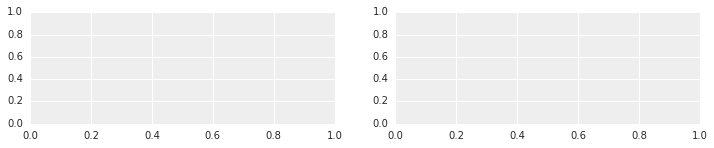

In [150]:
traceplot(trace, varnames=['p']);